Using cpu
min number pixels 11086570
pixels in chunk 524288
Chunks per iteration: 1
100 % of pixels used
It 10 - total loss: 0.8099117279052734, total MI loss: 0.809888482093811, total contrast loss: 2.3221969968290068e-05
It 20 - total loss: 0.809860110282898, total MI loss: 0.8098368048667908, total contrast loss: 2.3299455278902315e-05
It 30 - total loss: 0.8098074197769165, total MI loss: 0.8097841143608093, total contrast loss: 2.327561378479004e-05
It 40 - total loss: 0.809776782989502, total MI loss: 0.8097535371780396, total contrast loss: 2.3233891624840908e-05
It 50 - total loss: 0.80986487865448, total MI loss: 0.8098416328430176, total contrast loss: 2.3233891624840908e-05
It 60 - total loss: 0.809752345085144, total MI loss: 0.8097289800643921, total contrast loss: 2.334714008611627e-05
It 70 - total loss: 0.8095928430557251, total MI loss: 0.8095693588256836, total contrast loss: 2.347231020394247e-05
It 80 - total loss: 0.8093221187591553, total MI loss: 0.80929857492446

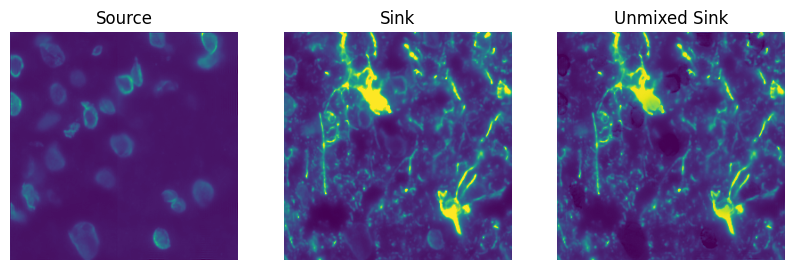

In [10]:
# Note matplotlib not included in picasso dependency
# !pip install matplotlib

from picasso.nn_picasso import PICASSOnn
from picasso.utils import sample_images
import numpy as np
from matplotlib import pyplot as plt


# Fetch sample images
# Dimensios = X, Y, Channel
# Channel 0  = sink image, Channel 1 = source image
ims = sample_images()
sink_im = ims[:,:,0]
source_im = ims[:,:,1]

# mixing matrix shape = total images, total sinks
# Each column needs the sink image denoted with 1 and corresponding source images with -1
mixing_matrix = np.array([[1],[-1]])

# Create PICASSO mixing model
model = PICASSOnn(mixing_matrix)

# Optimize model
for i in model.train_loop([sink_im, source_im]):
    pass

# Unmix images by batching on GPU
unmixed_sink = model.unmix_images([sink_im, source_im])

# Show Images
fig, axs = plt.subplots(1, 3, figsize = (10, 30))
axs[0].imshow(source_im)
axs[0].set_title('Source')
axs[1].imshow(sink_im)
axs[1].set_title('Sink')
axs[2].imshow(unmixed_sink.squeeze())
axs[2].set_title('Unmixed Sink')
for i in range(3):
    axs[i].axis('off')

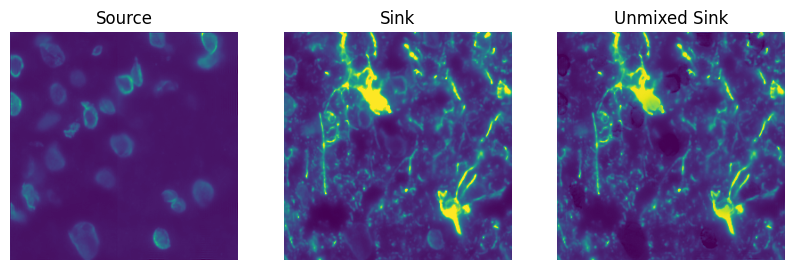

In [40]:
# Can also unmix using parameters from model

# Flatten images and arrange in columns that match the mixing matrix order
# ie mixing_matrix = [sink; source], so ims_ = [sink; source]
ims_ = np.array([sink_im.flatten(), source_im.flatten()]).T

# Get mixing parameters
mixing_parameters = model.mixing_parameters
alpha = mixing_parameters[0,:]
bg = mixing_parameters[1,:].T

# Unmix images
unmixed_im = (ims_ - bg).clip(min=0).dot(alpha)
unmixed_im = unmixed_im.clip(min=0).astype('uint16')
unmixed_sink2 = unmixed_im[:,0].reshape((256,256)).squeeze()

# Show Images
fig, axs = plt.subplots(1, 3, figsize = (10, 30))
axs[0].imshow(source_im)
axs[0].set_title('Source')
axs[1].imshow(sink_im)
axs[1].set_title('Sink')
axs[2].imshow(unmixed_sink2)
axs[2].set_title('Unmixed Sink')
for i in range(3):
    axs[i].axis('off')